In [35]:
# Import required libraries
import time
import numpy as np
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import tensorflow_hub as hub


# Load images and Preprocess

In [36]:
# Define image paths
content_path = '/content/drive/MyDrive/mist 4-2 sessional/cse444_pr/PR project/content/1.jpg'
style_path = '/content/drive/MyDrive/mist 4-2 sessional/cse444_pr/PR project/style/2.jpg'

# Load content and style images
content_image = plt.imread(content_path)
style_image = plt.imread(style_path)

# Convert images to float32 numpy arrays, add batch dimension, and normalize to range [0, 1]
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

# Resize style image to 256x256 (recommended size for style image)
style_image = tf.image.resize(style_image, (256, 256))


# Model download

In [37]:
# Load image stylization module.
hub_module = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')


Style Transfer

In [38]:
def run_style_transfer(content_image, style_image, hub_module):
    # Measure execution time (CPU and wall time)
    start_cpu = time.process_time()
    start_wall = time.time()

    # Stylize the content image using the style image
    outputs = hub_module(tf.constant(content_image), tf.constant(style_image))

    # Extract the stylized image from the outputs
    stylized_image = outputs[0]

    # Resize the stylized image to match the content image shape
    stylized_image_resized = tf.image.resize(stylized_image, content_image.shape[1:3])

    # Measure execution time (CPU and wall time)
    end_cpu = time.process_time()
    end_wall = time.time()

    # Convert TensorFlow tensors to NumPy arrays before performing operations
    content_image_np = content_image.squeeze()
    stylized_image_resized_np = stylized_image_resized.numpy().squeeze()

    # Compute Total Loss (Mean Squared Error - MSE)
    mse_loss = np.mean((content_image_np - stylized_image_resized_np) ** 2)

    # Compute Structural Similarity Index (SSIM)
    # Set win_size to 3 (or any odd number smaller than the smallest image dimension)
    ssim_score = ssim(content_image_np, stylized_image_resized_np,
                      multichannel=True, data_range=1.0, win_size=3)

    # Time taken for the process
    cpu_time = (end_cpu - start_cpu) * 1e6  # Convert to microseconds
    wall_time = (end_wall - start_wall) * 1e6  # Convert to microseconds

    # Print performance metrics
    print(f"Total Loss (MSE): {mse_loss:.6f}")
    print(f"Structural Similarity Index (SSIM): {ssim_score:.4f}")
    print(f"CPU Time: {cpu_time:.2f} µs")
    print(f"Wall Time: {wall_time:.2f} µs")

    return stylized_image_resized


# Show Output

Total Loss (MSE): 0.103010
Structural Similarity Index (SSIM): 0.2509
CPU Time: 5084555.24 µs
Wall Time: 3034219.98 µs


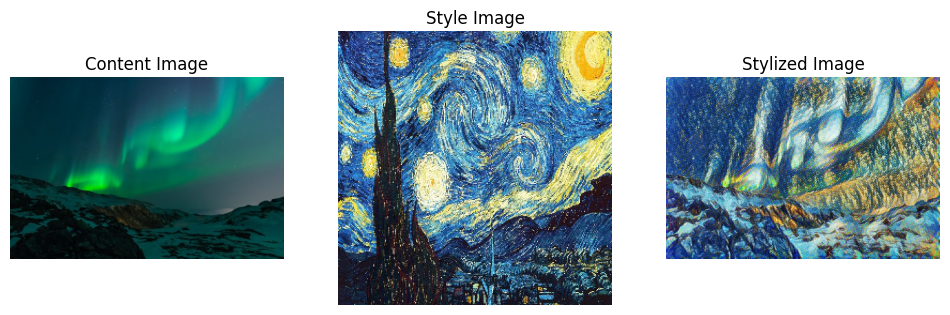

In [39]:
# Run style transfer and evaluate performance
stylized_image = run_style_transfer(content_image, style_image, hub_module)

# Display the original content, style, and stylized images
plt.figure(figsize=(12, 12))

# Content image
plt.subplot(1, 3, 1)
plt.imshow(content_image[0])
plt.title('Content Image')
plt.axis('off')

# Style image
plt.subplot(1, 3, 2)
plt.imshow(style_image[0])
plt.title('Style Image')
plt.axis('off')

# Stylized image
plt.subplot(1, 3, 3)
plt.imshow(stylized_image[0])
plt.title('Stylized Image')
plt.axis('off')

plt.show()
